# Movie Production Studio

**Authors:** Joan Maina
***

## Business Problem

Microsoft wants to venture into movie production and have decided to create a movie studio. They however have no information on how to go about movie production. They need to know the types of movies doing well at the box office and actionable insights to inform their course of action.
***
The approach taken with the analysis seeks to look at


*   The revenue/profit margins in the industry
*   Type of movie that would be successful by exploring the genres, production budget and runtime(length) of the movie.
*   The relationship between the budget, genre and runtime of the movie
***

## Data Sources
Data for this project was obtained from the following [repository](https://github.com/learn-co-curriculum/dsc-phase-1-project).
In the repository's folder zippedData, are movie datasets from:
*   Box Office Mojo
*   IMDB
*   Rotten Tomatoes
*   TheMovieDB
*   The Numbers

The data represents movies by genre,budget,grossing at the Box office, release year, runtime, date of release, number of reviews, movie rating and the studios involved in production.

These are the variables this analysis will focus on to derive insights.








# **Methodology**

The process can be divided into two main parts.

The first focuses on data preparation.
The steps include:
- Importing libraries
- Reading and cleaning provided data
- Dealing with missing values
- Joining datasets

Second section focuses on visualisations and insights.
For each characteristic we will be:
- Creating visualisations
- Drawing conclusions
- Providing recommendations

Finally a summary of the findings and recommendations will be in the last section.

# **Data** **preparation**

In [ ]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **Data** **reading**

In [ ]:
movie_gross=pd.read_csv('/content/bom.movie_gross.csv') #importing the data set movie gross
movie_gross.head() #previewing the data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [ ]:
movie_basics=pd.read_csv('/content/title.basics.csv') #importing the data set basics
movie_basics.head() #previewing the data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
ratings=pd.read_csv("/content/title.ratings.csv") #importing the data set ratings
ratings.head()#previewing the data

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
budgets=pd.read_csv("/content/tn.movie_budgets.csv") #importing the data set budgets
budgets.head()#previewing the data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,07-Jun-19,Dark Phoenix,350000000,42762350,149762350
3,4,01-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


**Summary of the data**

Four data sets will be used in the analysis.

The movie gross data set has information on the movies and released year, studios in production, the domestic and worldwide gross.

The basics data sets has a unique identifier for the movies, their primary title and original title, the start year, runtime in minutes and the genre of the movies.

The ratings data sets shows the average rating of the movie, the number of voters and the unique identifier for the movies.

In the budgets data set, we see the ids for the various movies, their release dates, production budget and the worldwide and domestic gross.




**Data** **Cleaning**:movie_gross

In [ ]:
#a preview of the movie_gross data
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [ ]:
# Getting a summary
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [ ]:
#checking for any duplicated values
movie_gross.duplicated().any()

False

In [ ]:
#checking for missing values
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
#Filling the rows with missing values with the mode in the studio column
#Getting the mode
mode_value = movie_gross['studio'].mode()[0]

#Filling with the mode value
movie_gross['studio'].fillna(mode_value, inplace=True)

#Checking that the rows are filled
movie_gross['studio'].isna().sum()

0

In [ ]:
#Filling the rows with missing values with the mdeian in the domestic gross column
#Getting the median
median_value=movie_gross['domestic_gross'].median()

#Filling with the median value
movie_gross['domestic_gross'].fillna(median_value, inplace=True)

#Checking that the rows are filled
movie_gross['domestic_gross'].isna().sum()

0

In [ ]:
#Filling the rows with missing values with the mdeian in the foreign gross column
#Getting the median
median_value1=movie_gross['foreign_gross'].median()

#Filling with the median value
movie_gross['foreign_gross'].fillna(median_value, inplace=True)

#Checking that the rows are filled
movie_gross['foreign_gross'].isna().sum()

0

The movie gross data frame is now ready for use

**Data** **Cleaning**:Movie Basics

In [ ]:
# Getting a summary
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
#checking for any duplicated values
movie_basics.duplicated().any()

False

In [ ]:
#checking for missing values
movie_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

The genres and original title columns have few rows with missing values in comparison to the whole data set.
Upon visual inspection the original title column is a repetition of the primary title column. I will therefore drop this coulumn.

I will also go on and drop the rows with null values in the genres column.

I will need to merge this data set with the movie_gross data set and will therefore rename the primary_title column to title.

In [ ]:
#Dropping the original_title column
movie_basics.drop(['original_title'],axis=1, inplace=True)

In [ ]:
#Previewing the data to check that it has dropped
movie_basics.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
# Filling missing values in the runtime_minutes column with median
movie_basics['runtime_minutes'] = movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].median())

In [ ]:
#Dropping the rows that contain null values in genres column
movie_basics.dropna(subset=['genres'], inplace=True)


In [ ]:
# Checking that the data set does not have missing values anymore
movie_basics.isna().sum()

tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [ ]:
#Renaming the primary_title column
movie_basics.rename(columns = {'primary_title':'title'}, inplace = True)

In [ ]:
#Previewing the data to check that it the column name has changed
movie_basics.head()

,tconst,title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


The data frame is ready for use

**Data** **Cleaning**:Ratings

In [ ]:
# Previewing the data set
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
# Getting a summary
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
#checking for any duplicated values
ratings.duplicated().any()

False

In [ ]:
#checking for any duplicated values
ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

The data frame is ready for use

Data Cleaning:Budgets

In [ ]:
# Previewing the data set
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,07-Jun-19,Dark Phoenix,350000000,42762350,149762350
3,4,01-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [ ]:
# Getting a summary
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


From the summary its clear that there are no missing values as all columns contain 5782 items.
The release_date column however, needs to be changed to a DateTime object.

We will need to merge the data set with the movie_gross data set and therefore the movies coulumn will be renamed to title.

We drop the id column as it holds no specific information and does not match any column in the movie_gross data set.

In [ ]:
# Remove id column
budgets.drop(['id'],axis=1, inplace=True)


In [ ]:
#Previewing the data to check that it has dropped
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,18-Dec-09,Avatar,425000000,760507625,2776345279
1,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,07-Jun-19,Dark Phoenix,350000000,42762350,149762350
3,01-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963
4,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [ ]:
#Checking the data
budgets.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross
0,18-Dec-09,Avatar,425000000,760507625,2776345279
1,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,07-Jun-19,Dark Phoenix,350000000,42762350,149762350
3,01-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963
4,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [ ]:
#Getting a summary
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   title              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


In [ ]:
# Convert release_date to a datetime object
pd.to_datetime(budgets['release_date'])

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

In [ ]:
# Create year column
pd.DatetimeIndex(budgets['release_date']).year

Int64Index([2009, 2011, 2019, 2015, 2017, 2015, 2018, 2007, 2017, 2015,
            ...
            2012, 1993, 2004, 2006, 2004, 2018, 1999, 2005, 2015, 2005],
           dtype='int64', name='release_date', length=5782)

In [ ]:
#Summary of statistics
budgets.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.415000e+03,5.415000e+03,5.415000e+03
mean,3.330801e+07,4.471128e+07,9.768800e+07
std,4.248758e+07,6.960989e+07,1.788591e+08
min,1.100000e+03,0.000000e+00,2.600000e+01
25%,6.000000e+06,3.160708e+06,7.004834e+06
50%,1.900000e+07,2.030022e+07,3.333987e+07
75%,4.200000e+07,5.578249e+07,1.044590e+08
max,4.250000e+08,9.366622e+08,2.776345e+09


In [ ]:
#Keeping rows in worldwide gross where the value is not zero
budgets = budgets[budgets['worldwide_gross'] != 0]

In [ ]:
budgets.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross
0,18-Dec-09,Avatar,425000000,760507625,2776345279
1,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,7-Jun-19,Dark Phoenix,350000000,42762350,149762350
3,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963
4,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [ ]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5415 non-null   object
 1   title              5415 non-null   object
 2   production_budget  5415 non-null   int64 
 3   domestic_gross     5415 non-null   int64 
 4   worldwide_gross    5415 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 382.9+ KB


Data Frame is ready

**Merging data frames**

We will be merging the budget data frame to the movie_basics so as to perform analysis on


*  Profit and loss analysis for the industry
* Profits over the years
*   Profits per genre
*   Profit relationship to worldwide gross
*   Profit vs runtime



This new data frame will be called movie_db

The second merger will be of the new data frame movie_db, to the movie_gross data frame.

This will be used to compare the
*   Distribution of revenue among the studios
*   Distribution of genres among the studios

The data frame will be called movies


In [ ]:
#Merging budgets to movie_basics to get the new data frame movie_db

movies_db= pd.merge(budgets, movie_basics, on = ['title'])
movies_db

,release_date,title,production_budget,domestic_gross,worldwide_gross,tconst,start_year,runtime_minutes,genres
0,18-Dec-09,Avatar,425000000,760507625,2776345279,tt1775309,2011,93.0,Horror
1,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136.0,"Action,Adventure,Fantasy"
2,07-Jun-19,Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113.0,"Action,Adventure,Sci-Fi"
3,01-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi"
4,27-Apr-18,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...
3374,01-Sep-15,Exeter,25000,0,489792,tt1945044,2015,91.0,"Horror,Mystery,Thriller"
3375,01-Sep-15,Exeter,25000,0,489792,tt2782686,2014,87.0,Horror
3376,28-Apr-06,Clean,10000,138711,138711,tt6619196,2017,70.0,"Comedy,Drama,Horror"
3377,06-Jul-01,Cure,10000,94596,94596,tt1872026,2011,93.0,Drama


From the preview we can see some duplicated values in the titles column. This is because of some of the titles have different start dates.

In [ ]:
# Sort movie by start year
movies_db = movies_db.sort_values('start_year', ascending = False)
# Drop duplicates, keep first occurence
movies_db= movies_db.drop_duplicates(subset = 'title', keep = 'first')

In [ ]:
# Getting a summary
movies_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 901 to 1212
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2084 non-null   object 
 1   title              2084 non-null   object 
 2   production_budget  2084 non-null   int64  
 3   domestic_gross     2084 non-null   int64  
 4   worldwide_gross    2084 non-null   int64  
 5   tconst             2084 non-null   object 
 6   start_year         2084 non-null   int64  
 7   runtime_minutes    2084 non-null   float64
 8   genres             2084 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 162.8+ KB


The duplicated values have been dropped seeing as the number of rows has reduced to 2084.

The merged data frame does not have any missing values

In [ ]:
#Checking for duplicates
movies_db.duplicated().any()

False

In [ ]:
#Introducing a new column 'profits'
movies_db['profits']=movies_db['worldwide_gross']-movies_db['production_budget']
movies_db.head(5)

,release_date,title,production_budget,domestic_gross,worldwide_gross,tconst,start_year,runtime_minutes,genres,profits
901,9-Feb-40,Pinocchio,2289247,84300000,84300000,tt1488589,2021,87.0,"Animation,Fantasy,Musical",82010753
1659,18-Aug-95,Mortal Kombat,20000000,70433227,122133227,tt0293429,2021,87.0,"Action,Adventure,Fantasy",102133227
2514,27-Apr-01,Akira,8000000,19585,19585,tt1134795,2021,87.0,"Action,Drama,Mystery",-7980415
367,13-Mar-15,Cinderella,95000000,201151353,534551353,tt10155932,2021,87.0,"Comedy,Fantasy",439551353
407,19-Jun-98,Mulan,90000000,120620254,303500000,tt4566758,2020,87.0,"Adventure,Drama,Family",213500000


The new data frame is now ready for use

In [ ]:
#Merging the movie_db data frame to the movie_gross data frame to get the movies data frame
movies = pd.merge(movies_db,movie_gross, on=['title'])
movies.head(5)

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,tconst,start_year,runtime_minutes,genres,profits,studio,domestic_gross_y,foreign_gross,year
0,10-Dec-10,The Tempest,20000000,277943,277943,tt9151364,2019,87.0,Drama,-19722057,Mira.,278000.0,68700.0,2010
1,18-Jan-13,The Last Stand,30000000,12050299,48330757,tt8774508,2019,93.0,Drama,18330757,LGF,12100000.0,36300000.0,2013
2,10-Feb-12,Safe House,85000000,126181630,208542162,tt10467112,2019,87.0,Action,123542162,Uni.,126400000.0,81700000.0,2012
3,2-Dec-16,Believe,3500000,890303,890303,tt7399140,2019,109.0,Drama,-2609697,ORF,6200000.0,1400000.0,2013
4,15-Sep-10,Never Let Me Go,15000000,2434652,11173718,tt9776362,2019,87.0,Drama,-3826282,FoxS,2400000.0,7000000.0,2010


In [ ]:
#Getting a summarry
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 0 to 1155
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1156 non-null   object 
 1   title              1156 non-null   object 
 2   production_budget  1156 non-null   int64  
 3   domestic_gross_x   1156 non-null   int64  
 4   worldwide_gross    1156 non-null   int64  
 5   tconst             1156 non-null   object 
 6   start_year         1156 non-null   int64  
 7   runtime_minutes    1156 non-null   float64
 8   genres             1156 non-null   object 
 9   studio             1156 non-null   object 
 10  domestic_gross_y   1156 non-null   float64
 11  foreign_gross      1156 non-null   float64
 12  year               1156 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 158.7+ KB


The data frame has no missing values.

In [ ]:
#Checking for duplicated values
movies.duplicated().any()

False

The movies data frame is ready for use

**Visualisations and Insights**

We will be performing analysis on the movies_db data frame to explore profit analysis for the industry
*   Profits over the years
*   Profits per genre
*   Profit relationship to worldwide gross
*   Profit in relation to the runtime
*   Profit in relation to the budget



In [ ]:
#Preview of movies_db
movies_db


,release_date,title,production_budget,domestic_gross,worldwide_gross,tconst,start_year,runtime_minutes,genres,profits
901,9-Feb-40,Pinocchio,2289247,84300000,84300000,tt1488589,2021,87.0,"Animation,Fantasy,Musical",82010753
1659,18-Aug-95,Mortal Kombat,20000000,70433227,122133227,tt0293429,2021,87.0,"Action,Adventure,Fantasy",102133227
2514,27-Apr-01,Akira,8000000,19585,19585,tt1134795,2021,87.0,"Action,Drama,Mystery",-7980415
367,13-Mar-15,Cinderella,95000000,201151353,534551353,tt10155932,2021,87.0,"Comedy,Fantasy",439551353
407,19-Jun-98,Mulan,90000000,120620254,303500000,tt4566758,2020,87.0,"Adventure,Drama,Family",213500000
...,...,...,...,...,...,...,...,...,...,...
3117,19-Aug-11,Amigo,1500000,184705,184705,tt1562847,2010,124.0,"Drama,War",-1315295
1147,30-Apr-10,Furry Vengeance,35000000,17630465,39340177,tt0492389,2010,92.0,"Comedy,Family",4340177
1174,28-Jan-11,Biutiful,35000000,5101237,24687524,tt1164999,2010,148.0,"Drama,Romance",-10312476
2185,14-May-10,Just Wright,12000000,21540363,21867665,tt1407061,2010,100.0,"Comedy,Romance,Sport",9867665


Profit analysis for the industry

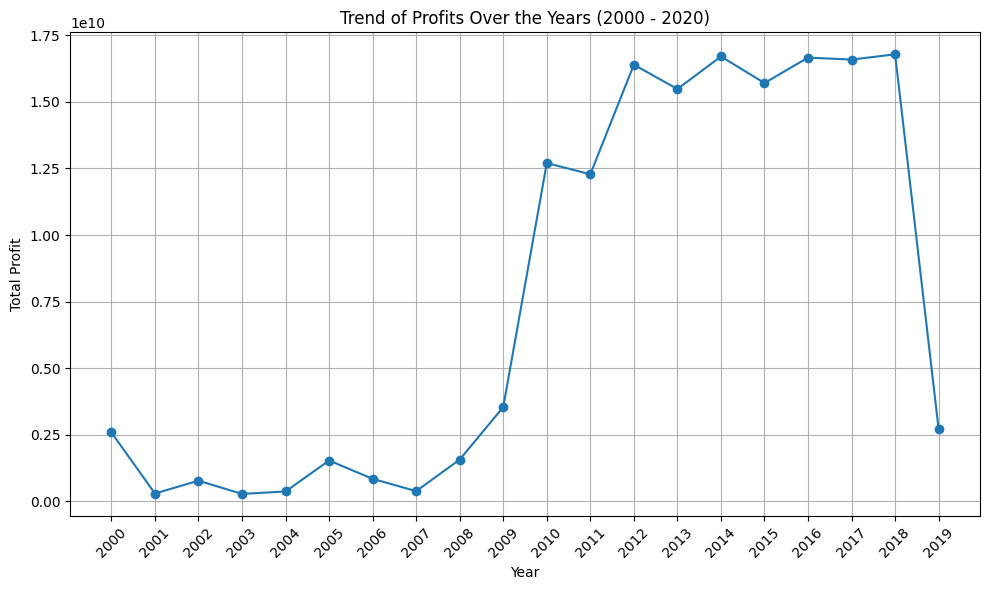

In [ ]:
#Profit over the years
# Filter the dataset to include only the years from 2000 to 2019
recent_movies = movies_db[(movies_db['Year'] >= 2000) & (movies_db['Year'] <= 2024)]

# Group the data by year and calculate total profit for each year
yearly_profit = recent_movies.groupby('Year')['profits'].sum()


# Plot a line plot to visualize the trend of profits over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_profit.index, yearly_profit.values, marker='o', linestyle='-')
plt.title('Trend of Profits Over the Years (2000 - 2020)')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.tight_layout()
plt.show()

The trend of profits has been fluctuating over the years.
The sudden rise between 2009 to 2010 should be investigated to find out what informs the rise.
There sudden drop in 2019 should be investigated to understand the occurrence.

In [ ]:
#Profit per genre analysis
profits_by_genre = pd.DataFrame(movies_db.groupby('genres')['profits'].sum()).sort_values( by ='profits',ascending=False).head(10)
profits_by_genre

,profits
genres,
"Action,Adventure,Sci-Fi",25101343554
"Adventure,Animation,Comedy",19246091199
"Action,Adventure,Fantasy",7858888738
"Action,Adventure,Comedy",6890895595
"Action,Adventure,Animation",5478379310
Documentary,5062951253
Drama,4552764160
Horror,3850103446
"Action,Crime,Thriller",3377407503


Text(0.5, 1.0, 'Profits per Genre')

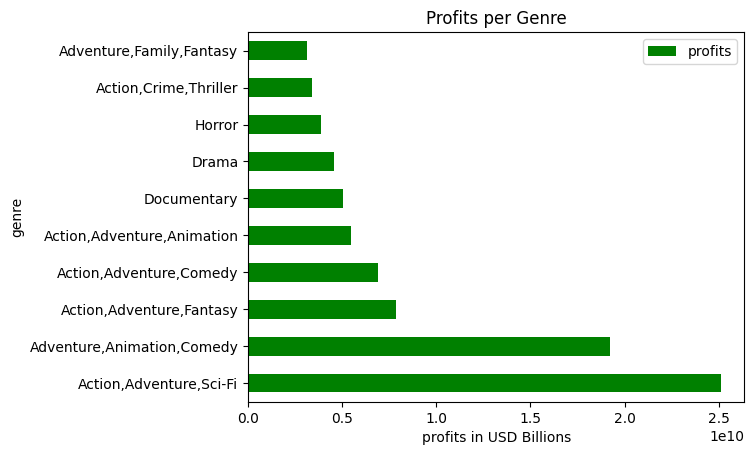

In [ ]:
# Plot bar chart
profits_by_genre.plot(kind='barh', color='green')

# Customize plot
plt.xlabel('profits in USD Billions')
plt.ylabel('genre')
plt.title('Profits per Genre')

From the result above we can see the top grossing genres.
This suggests that producing the Action,Adventure, SciFi genre will result in higher profits than the rest of the genres.

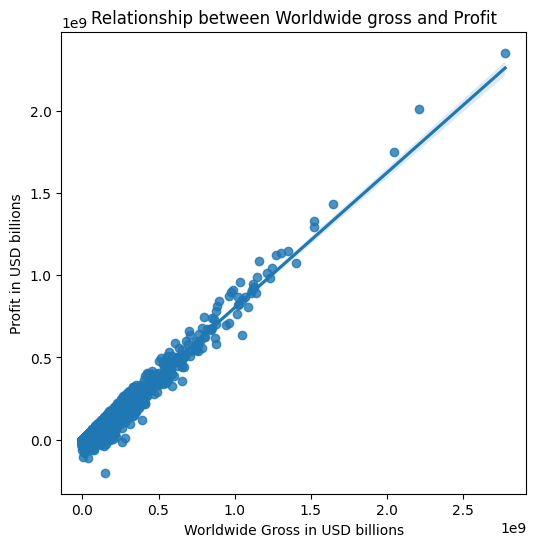

In [ ]:
# Plot relationship between profit and worldwide gross
plt.figure(figsize = (6,6))
sns.regplot(x = 'worldwide_gross', y = 'profits', data = movies_db)
plt.title('Relationship between Worldwide gross and Profit')
plt.xlabel('Worldwide Gross in USD billions')
plt.ylabel('Profit in USD billions')
plt.show()

There is a direct relationship between worldwide gross and profits.
This is an indication that high grossing movies, genres result in high profits.

In [ ]:
#Profit vs runtime
profits_by_runtime = pd.DataFrame(movies_db.groupby('runtime_minutes')['profits'].sum()).sort_values( by ='profits',ascending=False).head(10)
profits_by_runtime

,profits
runtime_minutes,
87.0,8726893042
93.0,4219114180
102.0,4029726240
130.0,3994886031
115.0,3965749067
106.0,3678435997
143.0,3651907957
123.0,3648087413
108.0,3636293528


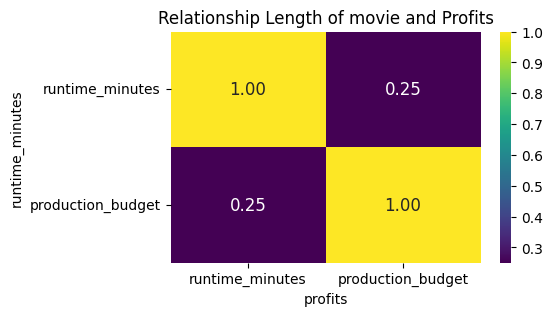

In [ ]:
#Plot relationship between runtime and profits
plt.figure(figsize=(5, 3))
sns.heatmap(data=movies_db[['runtime_minutes', 'production_budget']].corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Relationship Length of movie and Profits')
plt.xlabel('profits')
plt.ylabel('runtime_minutes')
plt.show()

There is a very low correlation between the length of the movie and the profits.

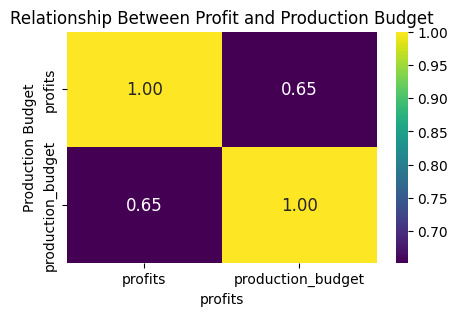

In [ ]:
#Plot relationship between profits and production_budget
plt.figure(figsize=(5, 3))
sns.heatmap(data=movies_db[['profits', 'production_budget']].corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Relationship Between Profit and Production Budget')
plt.xlabel('profits')
plt.ylabel('Production Budget')
plt.show()

There is a high correlation between the production budget and the profits. This shows that the more investment pu into production, the more revenue is earned.

**Market analysis**

We now use the movies data frame to check;
*   Distribution of profits among the studios
*   Distribution of genres among the studios





In [ ]:
#A preview of the data frame
movies.head(5)

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,tconst,start_year,runtime_minutes,genres,profits,studio,domestic_gross_y,foreign_gross,year
0,10-Dec-10,The Tempest,20000000,277943,277943,tt9151364,2019,87.0,Drama,-19722057,Mira.,278000.0,68700.0,2010
1,18-Jan-13,The Last Stand,30000000,12050299,48330757,tt8774508,2019,93.0,Drama,18330757,LGF,12100000.0,36300000.0,2013
2,10-Feb-12,Safe House,85000000,126181630,208542162,tt10467112,2019,87.0,Action,123542162,Uni.,126400000.0,81700000.0,2012
3,2-Dec-16,Believe,3500000,890303,890303,tt7399140,2019,109.0,Drama,-2609697,ORF,6200000.0,1400000.0,2013
4,15-Sep-10,Never Let Me Go,15000000,2434652,11173718,tt9776362,2019,87.0,Drama,-3826282,FoxS,2400000.0,7000000.0,2010


In [ ]:
# Distribution of revenue among the studios

revenue=pd.DataFrame(movies.groupby('studio')['profits'].sum()).sort_values( by ='profits',ascending=False)
revenue

,profits
studio,
BV,23670692430
Uni.,20601703744
Fox,18671500442
WB,13808579895
Sony,11861833894
...,...
MNE,-33479815
VE,-36419674
Gold.,-45604455


In [ ]:
revenue.describe()

,profits
count,8.900000e+01
mean,1.436362e+09
std,4.343882e+09
min,-7.670802e+07
25%,-4.572344e+06
50%,1.151520e+07
75%,2.850348e+08
max,2.367069e+10


From the data we can see that there are 89 studios in the market.
The mean profit in the industry is USD 14B. This is indicative of how much revenue could be brought by venturing into the market.


Text(0.5, 1.0, 'Profits per studio')

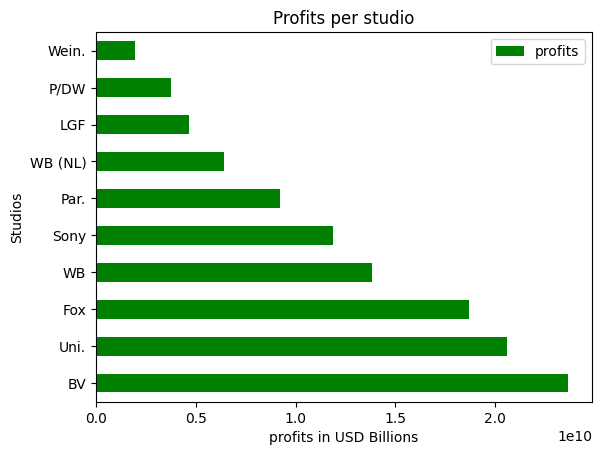

In [ ]:
#Extracting the top 10 studios and their revenues
top_10_studios=pd.DataFrame(movies.groupby('studio')['profits'].sum()).sort_values( by ='profits',ascending=False).head(10)
# Plot bar chart
top_10_studios.plot(kind='barh', color='green')

# Customize plot
plt.xlabel('profits in USD Billions')
plt.ylabel('Studios')
plt.title('Profits per studio')

In [ ]:
#Genre per studio analysis
genres_by_studio = pd.DataFrame(movies.groupby('genres')['studio'].sum())
genres_by_studio.describe()

,studio
count,205
unique,165
top,Fox
freq,6


The Fox studio has a has the widest range production across the genres at 6.

Given it is the 3rd highest among the most profitable studios it could indicate that versatility in production could mean more profits.


**Conclusions**

**Profits**

*  There is a high correlation between profit and worldwide gross. If the grossing of a movie is high then this is an indicator tha the profit is also high

* The highest grossing genre is Action,Adventure, SciFi genre will result in higher profits than the rest of the genres.

*   The length of a movie does necessarily affect its grossing value/profits.
*   Production budgets highly affects profits. A big investment in budget could result in a high profit.

**Market**


*  From the data we can see that there are 89 studios in the market.
The mean profit in the industry is USD 14B. This is indicative of how much revenue could be brought by venturing into the market.

*   The Fox studio has a has the widest range production across the genres at 6.

Given it is the 3rd highest among the most profitable studios it could indicate that versatility in production could mean more profits.



**Recommendations**


*   A higher budget film yields a high profit. With the market mean budget at USD 38.8B, a budget film above this will see a return of Usd 14.3B.
*   Investing in mix of genres is recommended.






